# *Bike Sharing Assignment*

## 1. Reading and understanding the data

In [1]:
# Filtering out the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
# Importing the Dataset.
data=pd.read_csv("day.csv")

In [4]:
# Checking the data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Renaming the required columns for our understanding.
data=data.rename(columns={'yr':'year','mnth':'month','temp':'temperature','hum':'humidity','cnt':'count'})
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Checking the shape of the dataset.
data.shape

(730, 16)

In [7]:
#Checking the data type of variables and for the presence of null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       730 non-null    int64  
 3   year         730 non-null    int64  
 4   month        730 non-null    int64  
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    int64  
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    int64  
 9   temperature  730 non-null    float64
 10  atemp        730 non-null    float64
 11  humidity     730 non-null    float64
 12  windspeed    730 non-null    float64
 13  casual       730 non-null    int64  
 14  registered   730 non-null    int64  
 15  count        730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Converting the 'dteday' column into 'datetime' data type
data['dteday'] = data['dteday'].astype('datetime64')

In [9]:
# Checking for null values.
data.isnull().sum()

instant        0
dteday         0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [10]:
# Describing the data.
data.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Mapping the categorical variables 'season', 'month', 'holiday', 'weekday', 'workingday' and 'weathersit'.
data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data['year']=data.year.map({0:'2018', 1:'2019'})
data['month']=data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['holiday']=data.holiday.map({0:'yes',1:'no'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
data['workingday']=data.workingday.map({0:'yes',1:'no'})
data['weathersit']=data.weathersit.map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,2018,Jan,yes,Mon,no,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,yes,Tue,no,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,yes,Wed,no,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,yes,Thu,no,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,yes,Fri,no,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#Checking if all the categorical variables have 'object' datatype.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      730 non-null    int64         
 1   dteday       730 non-null    datetime64[ns]
 2   season       730 non-null    object        
 3   year         730 non-null    object        
 4   month        730 non-null    object        
 5   holiday      730 non-null    object        
 6   weekday      730 non-null    object        
 7   workingday   730 non-null    object        
 8   weathersit   730 non-null    object        
 9   temperature  730 non-null    float64       
 10  atemp        730 non-null    float64       
 11  humidity     730 non-null    float64       
 12  windspeed    730 non-null    float64       
 13  casual       730 non-null    int64         
 14  registered   730 non-null    int64         
 15  count        730 non-null    int64         
dtypes: datet

## 2.Data Visualization

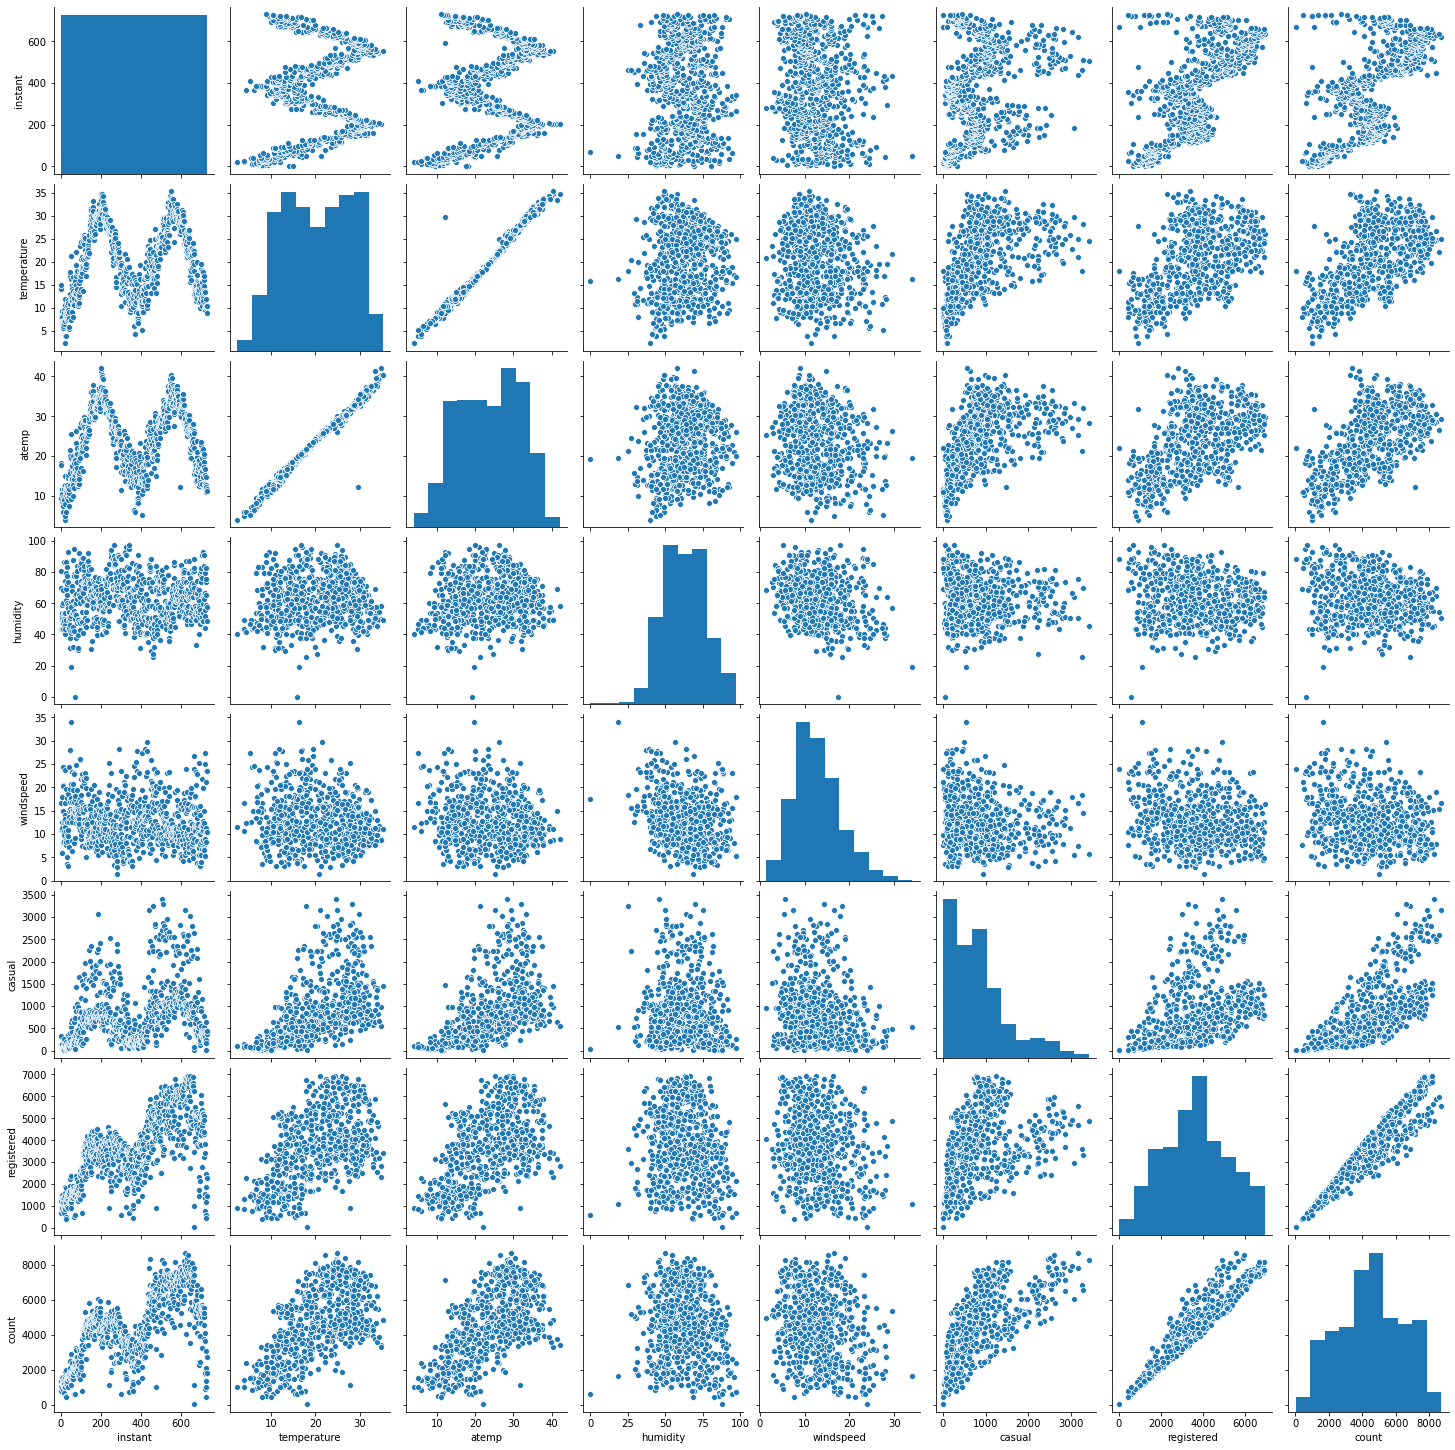

In [13]:
#Visualizing the numeric variables.
numvars=['instant','temperature','atemp','humidity','windspeed','casual','registered','count']
sns.pairplot(data,vars=numvars)
plt.show()

### From the above plots the following inferences can be made:
1. It is evident that some of the independent variables are positively correlated to the dependent variable.
2. Temp and atemp are highly positively correlated.
3. Casual and registered are higly positively correalted with count.
4. Temperature is also highly correlated with count.

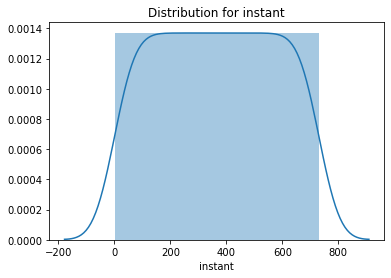

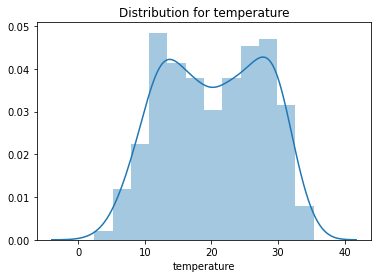

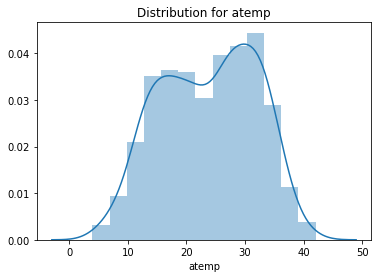

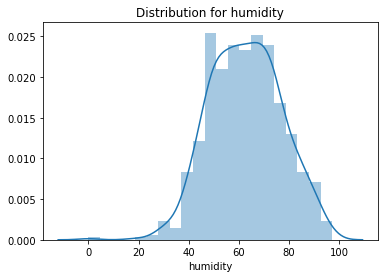

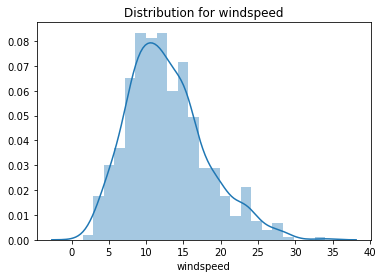

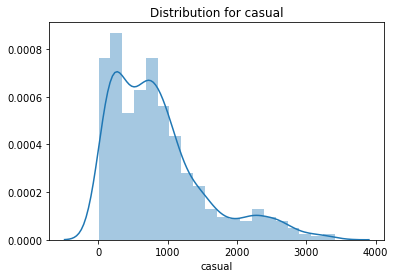

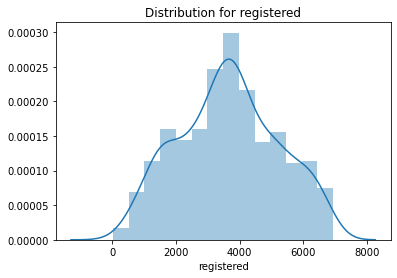

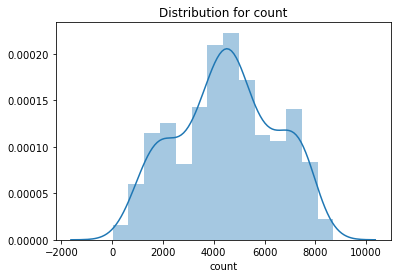

In [14]:
#Distribution plots for all the numeric variables.
for x in numvars:
    sns.distplot(data[x])
    plt.title("Distribution for "+x)
    plt.show()

### From the above plots the following inferences can be made:
1. The distribution is similar for temp and atemp variables.
2. The humidity mostly lies between 40-60.
3. The windspeed is mostly around 10.
 

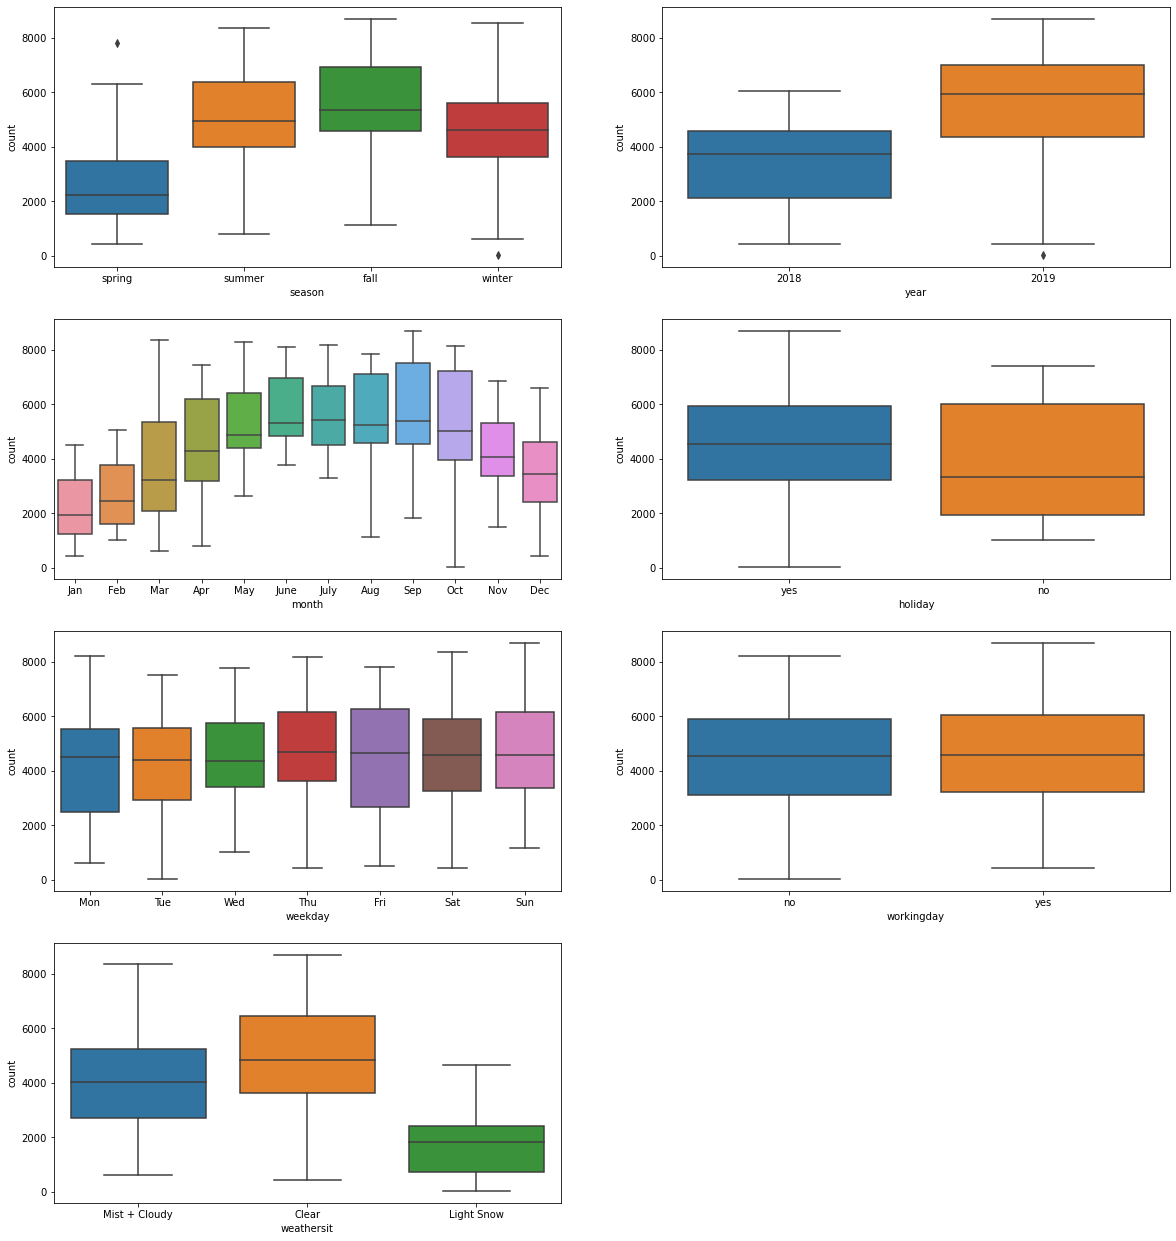

In [15]:
#Visualizing the categorical variables.
plt.figure(figsize=(20, 22))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'count', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'year', y = 'count', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'month', y = 'count', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'count', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'count', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'count', data = data)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'count', data = data)
plt.show()

### From the above boxplots the following inferences can be made:
1. Most number of bikes are rented in the fall season and the least in spring.
2. The year 2019 has considerably more rentals compared to 2018.
3. The number of bikes rented is the lowest in January and goes on to increase till September and then it decreases, this is most likely due to the seasons.
4. The day of the week does not seem to have a considerable impact on the number of bikes rented.
5. The weather also plays a role in the number of bikes rented, as expected most number of bikes are rented when there is a clear sky, and least when its snowing.

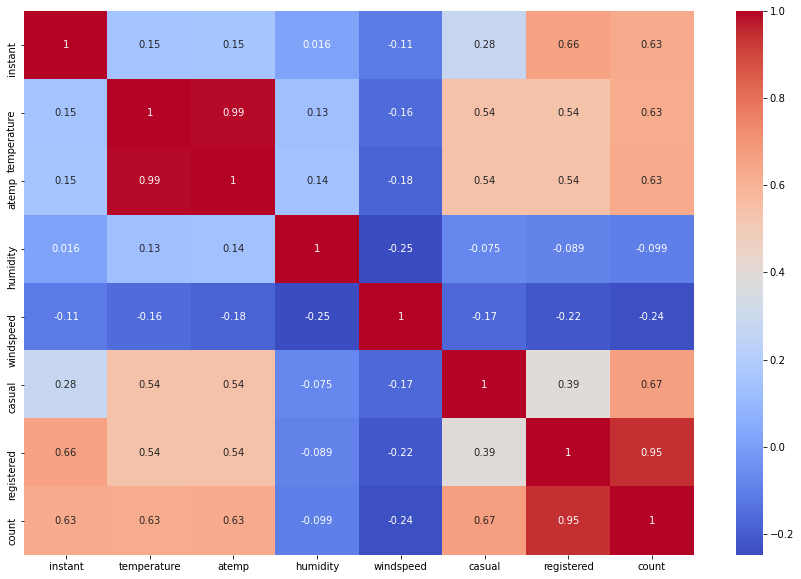

In [16]:
# Visualizing the correlation between numeric variables.
plt.figure(figsize=[15,10])
sns.heatmap(data=data.corr(),annot=True,cmap="coolwarm")
plt.show()

### From the above heatmap the following inferences can be made:
1. Temp and atemp are highly correlated, therefore one of them have to be dropped (most likely atemp).
2. Temperature seems to have the highest correlation with the dependent variable (count).
3. Since registered and casual varibles add up to count variable they are insignificant in our analysys even though they are higly correlated to count variable.

## 3. Data preparation

In [17]:
 # Dropping atemp column as it is highly correlated to 'temp' column
data.drop('atemp',axis=1,inplace=True) 

In [18]:
# Dropping insignificant columns.
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [19]:
# Checking the final dataset.
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count
0,spring,2018,Jan,yes,Mon,no,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,yes,Tue,no,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,yes,Wed,no,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,yes,Thu,no,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,yes,Fri,no,Clear,9.305237,43.6957,12.522300,1600


In [20]:
#Checking the datatypes of the cleaned dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    object 
 2   month        730 non-null    object 
 3   holiday      730 non-null    object 
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    object 
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   humidity     730 non-null    float64
 9   windspeed    730 non-null    float64
 10  count        730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


In [21]:
# Creating dummy variables for all the categorical variables.
catvars=data.select_dtypes(include=['object'])
data1=pd.get_dummies(catvars, drop_first=True )
data1.head()

,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Snow,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
# Merging the original dataset with the dataset containing dummy variables.
df=pd.concat([data,data1],axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Snow,weathersit_Mist + Cloudy
0,spring,2018,Jan,yes,Mon,no,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,1,0,0,0,0,0,0,0,1
1,spring,2018,Jan,yes,Tue,no,Mist + Cloudy,14.902598,69.6087,16.652113,...,1,0,0,0,0,1,0,0,0,1
2,spring,2018,Jan,yes,Wed,no,Clear,8.050924,43.7273,16.636703,...,1,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,yes,Thu,no,Clear,8.200000,59.0435,10.739832,...,1,0,0,0,1,0,0,0,0,0
4,spring,2018,Jan,yes,Fri,no,Clear,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,0,0,0,0


In [23]:
# Dropping the original categorical variables as we have created dummies for them.
df=df.drop(catvars,axis=1)
df.head()

,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Snow,weathersit_Mist + Cloudy
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
# Checking the shape of the final dataset
df.shape

(730, 29)

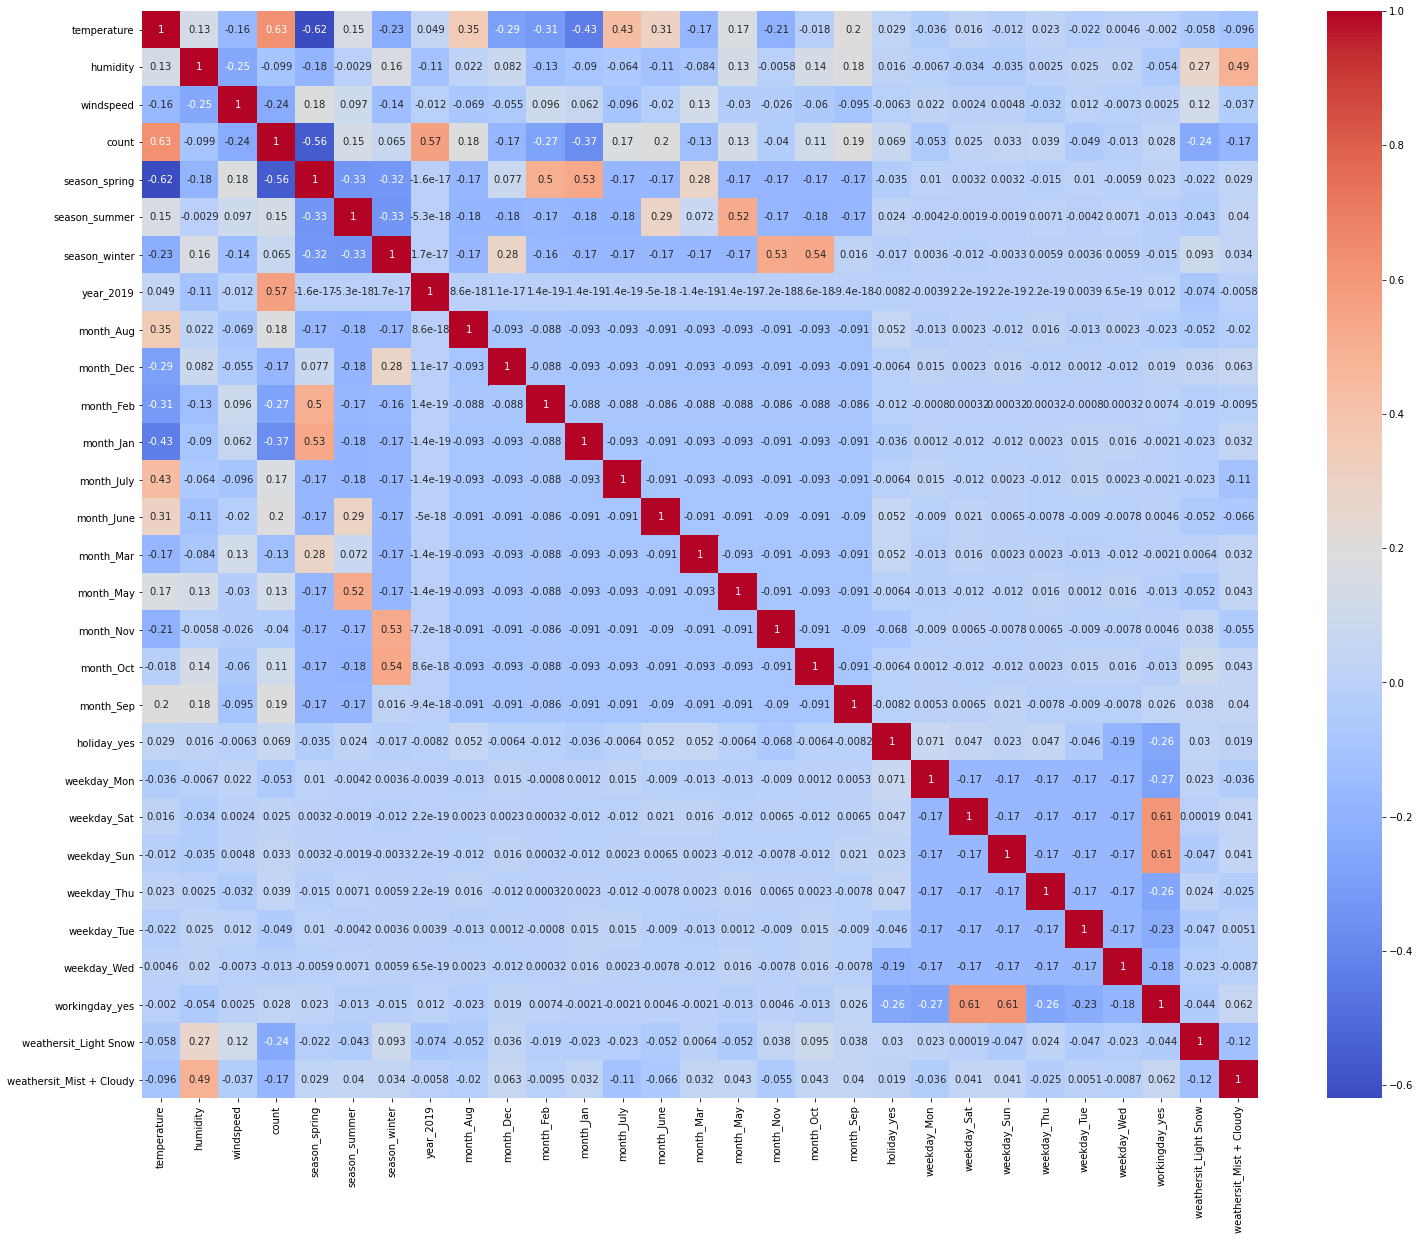

In [25]:
#Checking the correlation between variables again using a heatmap.
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.show()

### From the above heatmap the following inferences can be made:
1. It is evident that count is highly correlated with temperature, year and spring season, therefore these variables might play a big role in the number of bike rentals

## 4.Splitting the data into train and test data


In [26]:
# Importing the module for train test split.
from sklearn.model_selection import train_test_split

In [27]:
# Splitting the dataset into train and test.
df_train,df_test=train_test_split(df,train_size=0.7,random_state=0)

In [28]:
# Checking the shape of the train and test data.
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## 5. Scaling the data

In [29]:
# Importing the module to scale the data
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Performing MinMax scaling on the train data.
scaler=MinMaxScaler()
num_vars=['temperature','humidity','windspeed','count']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Snow,weathersit_Mist + Cloudy
524,0.802869,0.254640,0.255430,0.860101,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
12,0.089497,0.301044,0.647940,0.159227,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
161,0.821384,0.557424,0.281887,0.568799,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
556,0.810494,0.527842,0.274080,0.833180,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
502,0.611185,0.374709,0.236721,0.876323,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [31]:
# Splitting the train data into X and y train.
y_train=df_train.pop('count')
X_train=df_train

### Recursive Feature Elimination(RFE)

In [32]:
# Importing the module to perform RFE.
from sklearn.feature_selection import RFE

In [33]:
#Performing RFE.
reg=LinearRegression()
reg.fit(X_train,y_train)
rfe=RFE(reg,20)
rfe=rfe.fit(X_train,y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', True, 1),
 ('month_Dec', True, 1),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', True, 1),
 ('month_Mar', False, 9),
 ('month_May', False, 2),
 ('month_Nov', True, 1),
 ('month_Oct', False, 6),
 ('month_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 7),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 5),
 ('workingday_yes', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [35]:
# Columns with RFE support.
rfecols=X_train.columns[rfe.support_]

In [36]:
# Retaining the columns with RFE support.
X_train_rfe=X_train[rfecols]
X_train_rfe.head()

,temperature,humidity,windspeed,season_spring,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Nov,month_Sep,holiday_yes,weekday_Sat,weekday_Sun,workingday_yes,weathersit_Light Snow,weathersit_Mist + Cloudy
524,0.802869,0.254640,0.255430,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0
12,0.089497,0.301044,0.647940,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
161,0.821384,0.557424,0.281887,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
556,0.810494,0.527842,0.274080,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
502,0.611185,0.374709,0.236721,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0


In [37]:
# Importing statsmodels module.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Defining a function to build a model. 

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

# Defining a function to get VIF for all the variables. 

def getVIF(X):
    Vif = pd.DataFrame()
    Vif['Features'] = X.columns
    Vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    Vif['VIF'] = round(Vif['VIF'], 2)
    Vif = Vif.sort_values(by = "VIF", ascending = False)
    return(Vif)

In [39]:
# Building the first model.
X_train_new= build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.92e-175
Time:                        23:43:31   Log-Likelihood:                 511.34
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     489   BIC:                            -891.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,228.00
18,workingday_yes,47.30
16,weekday_Sat,27.09
17,weekday_Sun,26.23
1,temperature,6.18
15,holiday_yes,5.18
4,season_spring,3.82
10,month_Jan,2.40
5,season_winter,2.40
2,humidity,2.21


In [41]:
# Dropping 'weekday_Sun' as it has a high p value of 0.558.
X_train_new=X_train_new.drop('weekday_Sun',axis=1)

In [42]:
# Building the second model.
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.05e-176
Time:                        23:43:31   Log-Likelihood:                 511.17
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     490   BIC:                            -897.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [43]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,95.66
1,temperature,6.16
4,season_spring,3.81
5,season_winter,2.40
10,month_Jan,2.40
2,humidity,2.21
11,month_July,2.10
9,month_Feb,1.97
12,month_June,1.91
17,workingday_yes,1.89


In [44]:
# Dropping 'weekday_Sat' as it has a high p value of 0.567.
X_train_new=X_train_new.drop('weekday_Sat',axis=1)

In [45]:
# Building the third model.
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     135.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.04e-177
Time:                        23:43:32   Log-Likelihood:                 510.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     491   BIC:                            -903.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,92.16
1,temperature,6.15
4,season_spring,3.81
10,month_Jan,2.40
5,season_winter,2.39
2,humidity,2.21
11,month_July,2.10
9,month_Feb,1.97
12,month_June,1.91
13,month_Nov,1.86


In [47]:
# Dropping 'month_Sep' as it has a high p value of 0.079.
X_train_new=X_train_new.drop('month_Sep',axis=1)

In [48]:
# Building the fourth model.
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.55e-177
Time:                        23:43:32   Log-Likelihood:                 509.39
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     492   BIC:                            -906.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [49]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,90.33
1,temperature,5.44
4,season_spring,3.80
5,season_winter,2.38
10,month_Jan,2.37
2,humidity,2.21
9,month_Feb,1.96
13,month_Nov,1.86
11,month_July,1.82
12,month_June,1.67


In [50]:
# Dropping 'weekday_Sun' as it has a high p value of 0.031.
X_train_new=X_train_new.drop('month_Feb',axis=1)

In [51]:
# Building the fifth model.
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.25e-177
Time:                        23:43:32   Log-Likelihood:                 506.98
No. Observations:                 510   AIC:                            -980.0
Df Residuals:                     493   BIC:                            -908.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [52]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,88.95
1,temperature,5.25
4,season_spring,2.84
5,season_winter,2.37
2,humidity,2.21
12,month_Nov,1.82
10,month_July,1.80
11,month_June,1.66
16,weathersit_Mist + Cloudy,1.66
9,month_Jan,1.64


In [53]:
# Dropping 'month_Jan' as it has a high p value of 0.131.
X_train_new=X_train_new.drop('month_Jan',axis=1)

In [54]:
# Building the sixth model.
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     159.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.03e-178
Time:                        23:43:32   Log-Likelihood:                 505.80
No. Observations:                 510   AIC:                            -979.6
Df Residuals:                     494   BIC:                            -911.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,85.87
1,temperature,4.70
4,season_spring,2.70
5,season_winter,2.37
2,humidity,2.20
11,month_Nov,1.77
9,month_July,1.74
15,weathersit_Mist + Cloudy,1.66
10,month_June,1.62
7,month_Aug,1.54


In [56]:
# Dropping 'month_Dec' as it has a high p value of 0.07.
X_train_new=X_train_new.drop('month_Dec',axis=1)

In [57]:
# Building the seventh model.
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.16e-178
Time:                        23:43:32   Log-Likelihood:                 504.11
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     495   BIC:                            -914.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [58]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,84.28
1,temperature,4.34
4,season_spring,2.69
2,humidity,2.18
5,season_winter,2.11
8,month_July,1.71
14,weathersit_Mist + Cloudy,1.66
9,month_June,1.59
10,month_Nov,1.53
7,month_Aug,1.51


In [59]:
# Dropping 'month_Nov' as it has a high p value of 0.03.
X_train_new=X_train_new.drop('month_Nov',axis=1)

In [60]:
# Building the eight model.
X_train_new= build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.89e-179
Time:                        23:43:32   Log-Likelihood:                 501.67
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     496   BIC:                            -916.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [61]:
# Checking the VIF's.
getVIF(X_train_new)

,Features,VIF
0,const,81.46
1,temperature,4.14
4,season_spring,2.61
2,humidity,2.18
5,season_winter,1.81
8,month_July,1.69
13,weathersit_Mist + Cloudy,1.64
9,month_June,1.58
7,month_Aug,1.50
12,weathersit_Light Snow,1.36


#### This is our final model as there are neither high p-values nor high VIF values, and Prob (F-statistic) almost 0.

In [62]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred=lm.predict(X_train_new)

## 6.Residual analysis

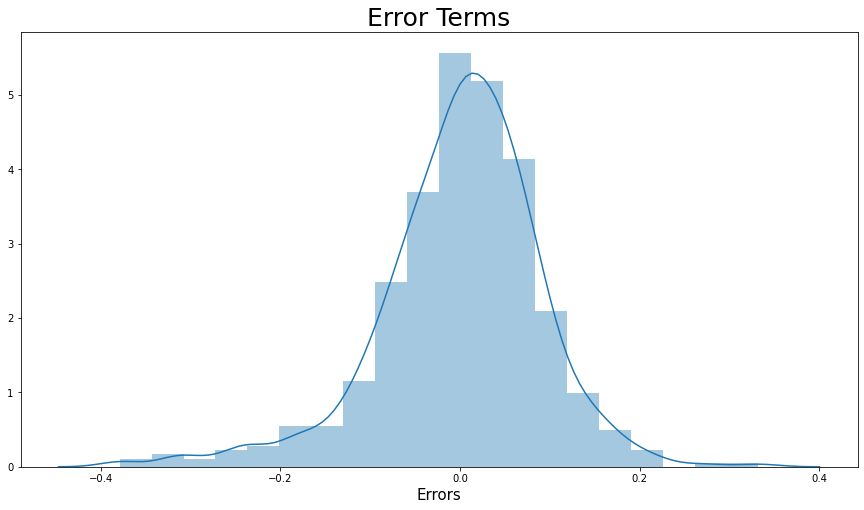

In [63]:
# Visualizing the errors.
plt.figure(figsize=(15,8))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 25)                 
plt.xlabel('Errors', fontsize = 15)  
plt.show()

### From the above plot the following inferences can be made:
1. The error terms are normally distributed.

## 7.Evaluating the model

In [64]:
# Scaling the test data.
numVars=['temperature','humidity','windspeed','count']
df_test[numVars]=scaler.transform(df_test[numVars])

In [65]:
df_test.head()

,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Snow,weathersit_Mist + Cloudy
196,0.771285,0.460557,0.415865,0.678900,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
187,0.854058,0.552784,0.292782,0.525771,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
14,0.178804,0.340487,0.289684,0.141049,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
31,0.125012,0.801018,0.027323,0.153935,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
390,0.320391,0.717517,0.077873,0.466291,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1


In [66]:
# Diving the test data into X and y test.
y_test=df_test.pop('count')
X_test=df_test

In [67]:
X_train_new.columns

Index(['const', 'temperature', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'year_2019', 'month_Aug', 'month_July', 'month_June',
       'holiday_yes', 'workingday_yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [68]:
X_test_new1=sm.add_constant(X_test)
X_test_new2=X_test_new1[X_train_new.columns]

In [69]:
X_test_new2.head()

,const,temperature,humidity,windspeed,season_spring,season_winter,year_2019,month_Aug,month_July,month_June,holiday_yes,workingday_yes,weathersit_Light Snow,weathersit_Mist + Cloudy
196,1.0,0.771285,0.460557,0.415865,0,0,0,0,1,0,1,0,0,0
187,1.0,0.854058,0.552784,0.292782,0,0,0,0,1,0,1,1,0,0
14,1.0,0.178804,0.340487,0.289684,1,0,0,0,0,0,1,0,0,1
31,1.0,0.125012,0.801018,0.027323,1,0,0,0,0,0,1,0,0,1
390,1.0,0.320391,0.717517,0.077873,1,0,1,0,0,0,1,1,0,1


In [70]:
# Predicting on test data using our model.
y_pred=lm.predict(X_test_new2)

In [71]:
# Finding r^2 for the test data.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8459003674912147

In [72]:
# Finding Adjusted r^2 for the test data.
# Adjusted r2=1-(1-R2)*(n-1)/(n-p-1)
Adjusted_r2=1-(1-0.84590036749)*(13-1)/(13-1-1)
print(Adjusted_r2)

0.8318913099890909


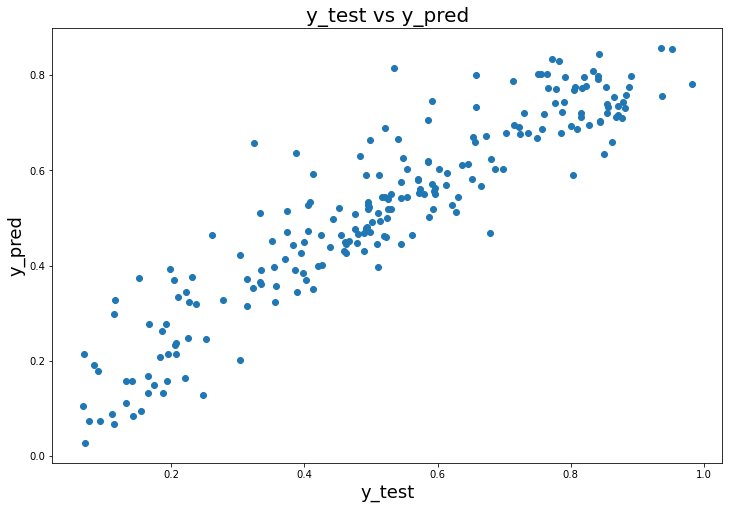

In [73]:
# Plotting y_test v/s y_pred to understand the spread.

plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 18)  
plt.show()

### Equation of our best fitted line is:
>-  count=0.5538 x temperature-humidity x 0.1494 -0.1367 x windspeed -0.1143 x season_spring+0.0343 x season_winter+0.2187 x year_2019-0.0742 x month_Aug-0.1382 x month_July -0.0819 x month_June+0.0916 x holiday_yes+0.0244 x workingday_yes-0.1888 x weathersit_Light Snow  -0.0411 x weathersit_Mist + Cloudy 
### Following are the results:
>- Train R^2 : 0.826
>- Train Adjusted R^2 : 0.821
>- Test R^2: 0.8459
>- Test Adjusted R^2: 0.83189
>- Difference in R^2 between Train and Test data: 2%
>- Difference in Adjusted R^2 between Train and Test data: 1% 
### The company should consider the below points:
>- The temperature has the highest coefficient, therefore plays the most important role in the number of bikes rented.
>- Summer and the Fall are the best seasons for expanding the business as the demand is high.
>- The Bikes are being rented more when the sky is clear or when the weather is pleasant.